In [1]:
# Importing required libraries
import numpy as np
import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
#from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing store data
store = pd.read_csv('C:/Users/suliman/Downloads/auto_insurance_sweden.csv')
store.head()

,Claims,Payments
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [71]:
store.shape

(63, 2)

In [72]:
store.info

<bound method DataFrame.info of     Claims  Payments
0      108     392.5
1       19      46.2
2       13      15.7
3      124     422.2
4       40     119.4
5       57     170.9
6       23      56.9
7       14      77.5
8       45     214.0
9       10      65.3
10       5      20.9
11      48     248.1
12      11      23.5
13      23      39.6
14       7      48.8
15       2       6.6
16      24     134.9
17       6      50.9
18       3       4.4
19      23     113.0
20       6      14.8
21       9      48.7
22       9      52.1
23       3      13.2
24      29     103.9
25       7      77.5
26       4      11.8
27      20      98.1
28       7      27.9
29       4      38.1
..     ...       ...
33       5      40.3
34      22     161.5
35      11      57.2
36      61     217.6
37      12      58.1
38       4      12.6
39      16      59.6
40      13      89.9
41      60     202.4
42      41     181.3
43      37     152.8
44      55     162.8
45      41      73.4
46      11      21.3
47

In [73]:
store.describe

<bound method NDFrame.describe of     Claims  Payments
0      108     392.5
1       19      46.2
2       13      15.7
3      124     422.2
4       40     119.4
5       57     170.9
6       23      56.9
7       14      77.5
8       45     214.0
9       10      65.3
10       5      20.9
11      48     248.1
12      11      23.5
13      23      39.6
14       7      48.8
15       2       6.6
16      24     134.9
17       6      50.9
18       3       4.4
19      23     113.0
20       6      14.8
21       9      48.7
22       9      52.1
23       3      13.2
24      29     103.9
25       7      77.5
26       4      11.8
27      20      98.1
28       7      27.9
29       4      38.1
..     ...       ...
33       5      40.3
34      22     161.5
35      11      57.2
36      61     217.6
37      12      58.1
38       4      12.6
39      16      59.6
40      13      89.9
41      60     202.4
42      41     181.3
43      37     152.8
44      55     162.8
45      41      73.4
46      11      21.3


In [74]:
store.isna().sum()

Claims      0
Payments    0
dtype: int64

In [75]:
# Generating descriptive statistics summary
store.describe().round()

,Claims,Payments
count,63.0,63.0
mean,23.0,98.0
std,23.0,87.0
min,0.0,0.0
25%,8.0,39.0
50%,14.0,73.0
75%,29.0,140.0
max,124.0,422.0


In [76]:
correlations = store.corr(method='pearson')
print(correlations)

            Claims  Payments
Claims    1.000000  0.912878
Payments  0.912878  1.000000


In [77]:
# Skew for each attribute
skew = store.skew()
print(skew)

Claims      2.316240
Payments    1.627071
dtype: float64


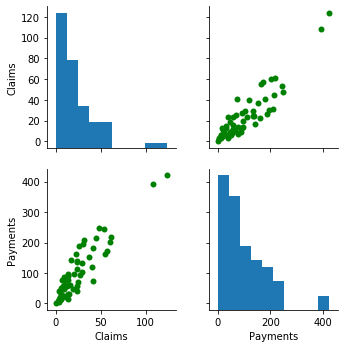

In [14]:
sns.pairplot(store, plot_kws=dict(marker="o", linewidth=0.02, color='green'))


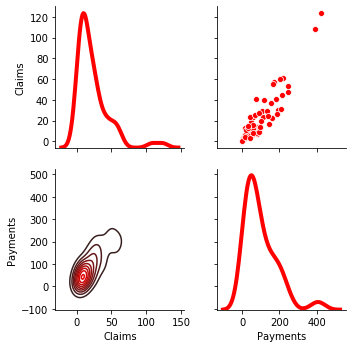

In [82]:
# Scatterplot Matrix
g = sns.PairGrid(store, diag_sharey=False)
g.map_upper(sns.scatterplot, lw=4, color = 'red')
g.map_lower(sns.kdeplot, lw=4, color = 'red')
g.map_diag(sns.kdeplot, lw=4, color = 'red')

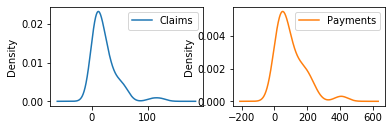

In [94]:
# Density Plots
store.plot(kind='density', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

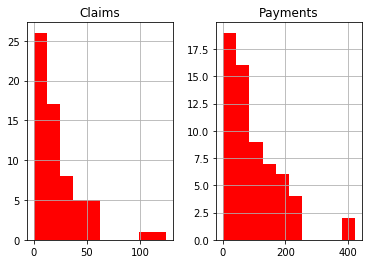

In [20]:
# Univariate Histograms
store.hist(color='red')
plt.show()

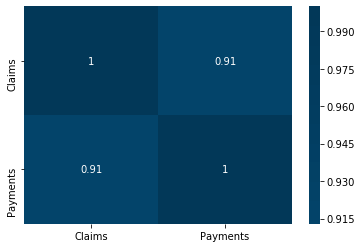

In [53]:
sns.heatmap(store.corr(), center = 0, annot =True, cmap='PuBu');

# calculating the mean and variance values

In [28]:
meanx = np.mean(store['Claims'])
meany = np.mean(store['Payments'])

varx = np.var(store['Claims'])
vary = np.var(store['Payments'])


print('x stats: mean= %.3f   variance= %.3f' % (meanx, varx))
print('y stats: mean= %.3f   variance= %.3f' % (meany, vary))

x stats: mean= 22.905   variance= 536.658
y stats: mean= 98.187   variance= 7505.052


# Calculating co variance

In [31]:
def covariance(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - meanx) * (y[i] - meany)
    return covar/len(x)



covarxy = covariance(store['Claims'], store['Payments'])
print(f'Cov(X,Y): {covarxy}')

Cov(X,Y): 1832.0543461829182


# Estimating coefficients

In [32]:
b1 = covarxy / varx
b0 = meany - b1 * meanx

print(f'Coefficents:\n b0: {b0}  b1: {b1} ')

Coefficents:
 b0: 19.99448575911481  b1: 3.413823560066367 


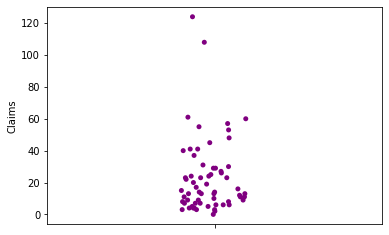

In [12]:
sns.stripplot(y=store['Claims'], lw= 2, color='purple')

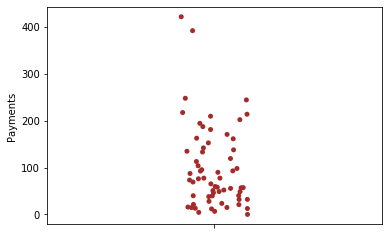

In [14]:
sns.stripplot(y=store['Payments'], lw= 2, color='brown')

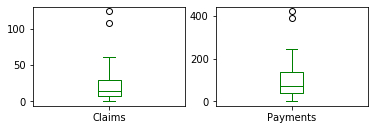

In [99]:
# Box and Whisker Plots
store.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, color='green')
plt.show()

In [ ]:
# Getting month year from order_date
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

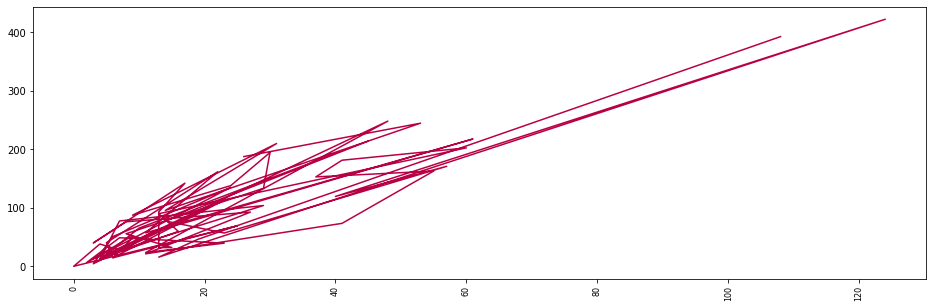

In [29]:

# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(store['Claims'], store['Payments'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

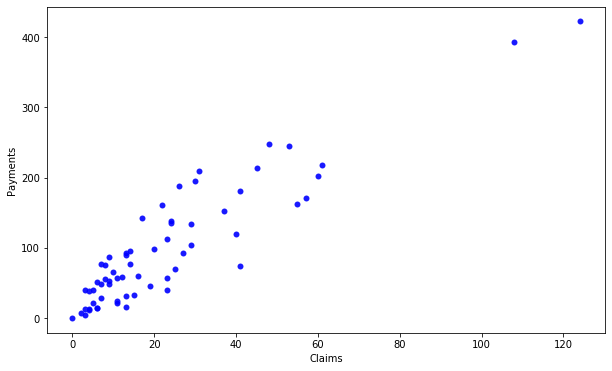

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = store['Claims'], y = store['Payments'], color = "blue", edgecolors = "white", linewidths = 0.05, alpha = 0.9)
plt.xlabel("Claims")
plt.ylabel("Payments")

plt.show()

Text(0, 0.5, 'Payments')

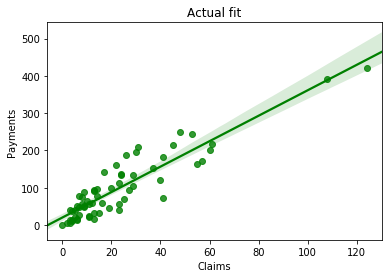

In [63]:
sns.regplot(x="Claims", y="Payments", data=store, color='green')
plt.title("Actual fit")
plt.xlabel("Claims")
plt.ylabel("Payments")

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
x = store['Claims'].values
y = store['Payments'].values

In [27]:
x = x.reshape(-1,1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.25, random_state=42)

# LINEAR REGRESSION

In [29]:
lrmodel = LinearRegression().fit(x_train, y_train)

In [56]:
lrmodel.score(x_test, y_test)

0.8480051329208175

In [31]:
lrpred = lrmodel.predict(x_test)

Text(0, 0.5, 'Payments')

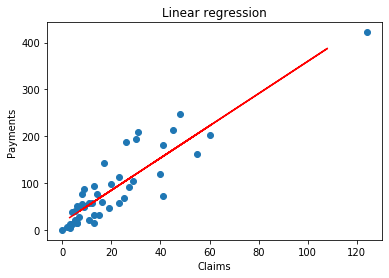

In [62]:
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, lrpred, color="red")
plt.title("Linear regression")
plt.xlabel("Claims")
plt.ylabel("Payments")

In [33]:
from sklearn.metrics import mean_absolute_error


In [57]:
print(mean_absolute_error(y_test, lrpred))
print(mean_squared_error(y_test, lrpred))
print(r2_score(y_test, lrpred))

30.35445698561995
1232.8485112665066
0.8480051329208175


# Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
DTRmodel = DecisionTreeRegressor()
DTRmodel.fit(x_train, y_train)
DTRmodel.score(x_test, y_test)
#print(treepredictions)

0.7842808490631761

In [36]:
DTRpred = DTRmodel.predict(x_test)

In [55]:
print(mean_absolute_error(y_test, DTRpred))
print(mean_squared_error(y_test, DTRpred))
print(r2_score(y_test, DTRpred))

35.75
1749.7237847222218
0.7842808490631761


Text(0, 0.5, 'Payments')

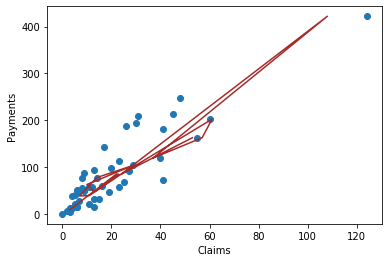

In [38]:
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, DTRpred, color="brown")
plt.xlabel("Claims")
plt.ylabel("Payments")

# LASSO REGRESSION

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lsomodel = Lasso()
lsomodel.fit(x_train, y_train)
lsomodel.score(x_test, y_test)

0.8480157845532655

In [41]:
lsopred = lsomodel.predict(x_test)

Text(0, 0.5, 'Payments')

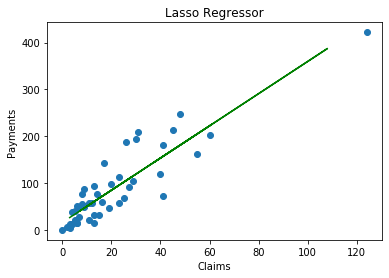

In [61]:
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, lsopred, color="green")
plt.title("Lasso Regressor")
plt.xlabel("Claims")
plt.ylabel("Payments")

In [43]:
print(mean_absolute_error(y_test, lsopred))
print(mean_squared_error(y_test, lsopred))

30.358702232859315
1232.762114604182


# KNeighborsRegressor

In [44]:
from sklearn.neighbors import KNeighborsRegressor

knrmodel = KNeighborsRegressor()
knrmodel.fit(x_train, y_train)
knrmodel.score(x_test, y_test)

0.6431030334823544

Text(0, 0.5, 'Payments')

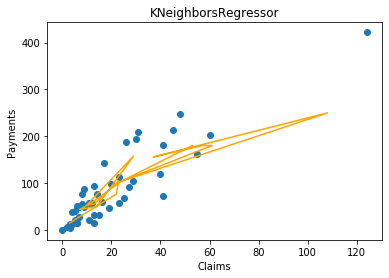

In [60]:
knrpred = knrmodel.predict(x_test)
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, knrpred, color="orange")
plt.title("KNeighborsRegressor")
plt.xlabel("Claims")
plt.ylabel("Payments")

In [46]:
print(mean_absolute_error(y_test, knrpred))
print(mean_squared_error(y_test, knrpred))

42.394999999999996
2894.8339


# Random forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor()
rfmodel.fit(x_train, y_train)
rfmodel.score(x_test, y_test)

0.8281254824074316

Text(0, 0.5, 'Payments')

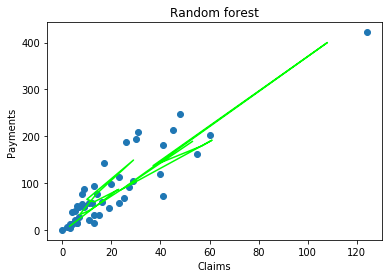

In [59]:
rfpred = rfmodel.predict(x_test)
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, rfpred, color="lime")
plt.title("Random forest")
plt.xlabel("Claims")
plt.ylabel("Payments")

In [49]:
print(mean_absolute_error(y_test, rfpred))
print(mean_squared_error(y_test, rfpred))

31.14430654761904
1394.0947297138605


# ELASTIC NET

In [50]:
from sklearn.linear_model import ElasticNet

elsmodel = ElasticNet()
elsmodel.fit(x_train, y_train)
elsmodel.score(x_test, y_test)

0.8480274466321793

Text(0, 0.5, 'Payments')

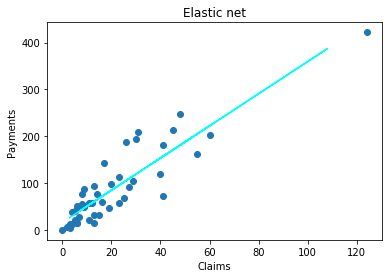

In [58]:
elspred = elsmodel.predict(x_test)
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, elspred, color="cyan")
plt.title("Elastic net")
plt.xlabel("Claims")
plt.ylabel("Payments")

In [52]:
print(mean_absolute_error(y_test, elspred))
print(mean_squared_error(y_test, elspred))

30.363873294760914
1232.667522089952
